# Simulation4

**Mengqi Liu**

**Jul 21, 2023**
___

## Recap

 - $N$: number of samples one time.
 - $M$: number of bins.
 - H0: $X\perp \!\!\! \perp Y \mid Z$, H1: $X\not \! \perp \!\!\! \perp Y \mid Z$
 - Methods:
   - "Cor_kernel" is the method put forward in "Local permutation tests for conditional independence" and I revised it a little bit to make it suitable for continuous $X,Y,Z$ according to page 20 of "Minimax Optimal Conditional Independence Testing"(which is also one of cited paper of the former).
   - "Linear_reg_y": regress $Y$ on $X,Z$ and take the *absolute* coefficient of $X$ as the test statistic.
   - "Linear_reg_x": regress $X$ on $Y,Z$ and take the *absolute* coefficient of $Y$ as the test statistic.
   - "Double_reg": regress $Y$ on $Z$ and regress $X$ on $Z$ separately. Take the *absolute* correlation between residuals from two linear regressions as the test statistic.
   - "double_Cor_kernel": double-binning method (each bin will be divided into $sub$ bins).
   - "Linear_reg_y_sub", "Linear_reg_x_sub", "Double_reg_sub": conduct "Linear_reg_y", "Linear_reg_x" and "Double_reg" with permutation in sub-partitions.


- $\alpha=0.05$

- $X = f_x(Z) + \epsilon$, $Y = f_y(Z) + \epsilon$

- Noise $\epsilon$:
  - various $a$
  - H0
    - normal: $N(Z, a)$
    - uni: $\textrm{Unif}([-a, +a])$
    - poi: Poisson($1/2$)
    - skewed_normal: $N(Z, a)$

  - H1
    - normal: $N\left([0, 0], \begin{pmatrix}
        a_1 & 0.8\cdot \sqrt{a_1a_2} \\
        0.8\cdot \sqrt{a_1a_2} & a_2 \\
    \end{pmatrix}\right)$
    - skewed_normal: $N\left([0, 0], \begin{pmatrix}
        a_1 & 0.8\cdot \sqrt{a_1a_2} \\
        0.8\cdot \sqrt{a_1a_2} & a_2 \\
    \end{pmatrix}\right)$, skewness = $[5, -5]$

- $N=100, Z\sim \textrm{Unif}([0,10))$, $M \in \{2, 5, 10, 16, 25, 50\}$.




## Smoothness 

 - is depicted by distance between $X｜Z$ and $X|\tilde Z$, where $\tilde Z$ is the representative in each bin.

 - different distance metrics: 
     - Hellinger distance / Rényi Divergence (*Local permutation tests for conditional independence*)
     - TV distance (*Nearest-Neighbor Sampling Based Conditional Independence Testing*)

## Questions

1. double binning
2. choice of number of sub-partitions
3. smoothness: yes+no no+no yes+yes
4. choice of xfunc, yfunc

## New gains

 - The number of sub-partitions in each interval will effect the power and type-1 control of "cor_kernel_sub" method.

 - High type-Ⅰ error without double binning.
    - sensitive to different distributions.
    - "Linear_reg_x" is the worst
    - experiment 5's last figure : special failure

 - Weak advantage of power.
    - distributions matter.
    - varying degrees of smoothness matter. (experiment 5)
    
 - "Linear_reg_y_sub", "Linear_reg_x_sub" and "Double_reg_sub" have almost the same performance. (have checked the code)

 - Failure in part Ⅱ: $X|Z$ is smooth and $Y|Z$ is the more non-smooth due to polynomial $f_y$$.

## Part Ⅰ: Linear $f_x$ & $f_y$ in $Z$



___

**Smooth $X|Z$ and non-smooth $Y|Z$**

___

### experiment 1

$f_x(Z)=Z$, $f_y(Z)=Z$, sub $=4$, $\epsilon_x \sim N(\cdot, 1)$, $\epsilon_y \sim N(\cdot, 0.1)$.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

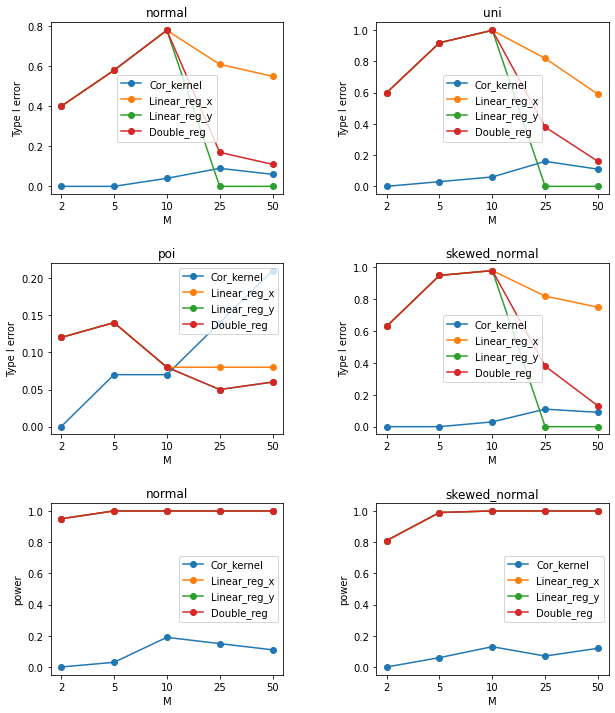

In [8]:
types = ["normal", "uni", "poi", "skewed_normal", "normal", "skewed_normal"]
hs =  ["h0"] * 4 + ["h1"] * 2
plt.figure(figsize=(10,12))
plt.subplots_adjust(wspace=.4, hspace=.4)
for t in range(len(types)):
    plt.subplot(3, 2, t+1)
    result = pd.read_csv("./results/result_smooth/result_func0_"+hs[t]+"_"+types[t]+".csv", index_col=0)
    plt.plot(result.T, '-o')
    plt.xlabel("M")
    if hs[t] == "h0":
        plt.ylabel("Type I error")
    else:
        plt.ylabel("power")
    plt.legend(result.index)
    plt.title(types[t])
plt.show()

### experiment 2

$f_x(Z)=Z$, $f_y(Z)=Z$, sub $=2$, $\epsilon_x \sim N(\cdot, 1)$, $\epsilon_y \sim N(\cdot, 0.1)$.

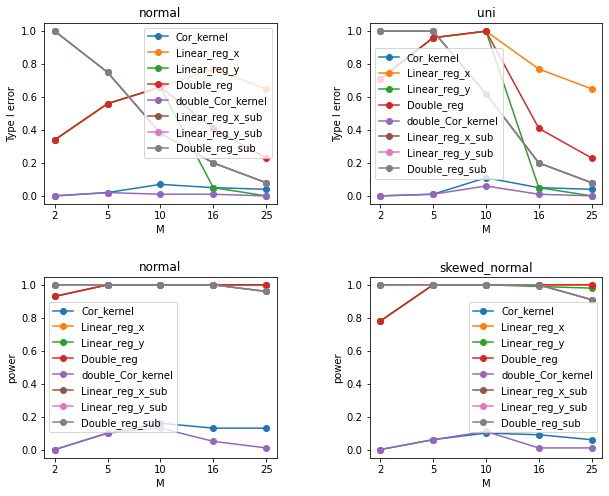

In [9]:
types = ["normal", "uni", "normal", "skewed_normal"]
hs =  ["h0"] * 2 + ["h1"] * 2
plt.figure(figsize=(10,8))
plt.subplots_adjust(wspace=.4, hspace=.4)
for t in range(len(types)):
    plt.subplot(2, 2, t+1)
    result = pd.read_csv("./results/result_smooth/result_func0_10_"+hs[t]+"_"+types[t]+".csv", index_col=0)
    result = result.iloc[:,]
    plt.plot(result.T, '-o')
    plt.xlabel("M")
    if hs[t] == "h0":
        plt.ylabel("Type I error")
    else:
        plt.ylabel("power")
    plt.legend(result.index)
    plt.title(types[t])
plt.show()

### experiment 3

$f_x(Z)=Z$, $f_y(Z)=-Z$, sub $=4$, $\epsilon_x \sim N(\cdot, 1)$, $\epsilon_y \sim N(\cdot, 0.1)$.

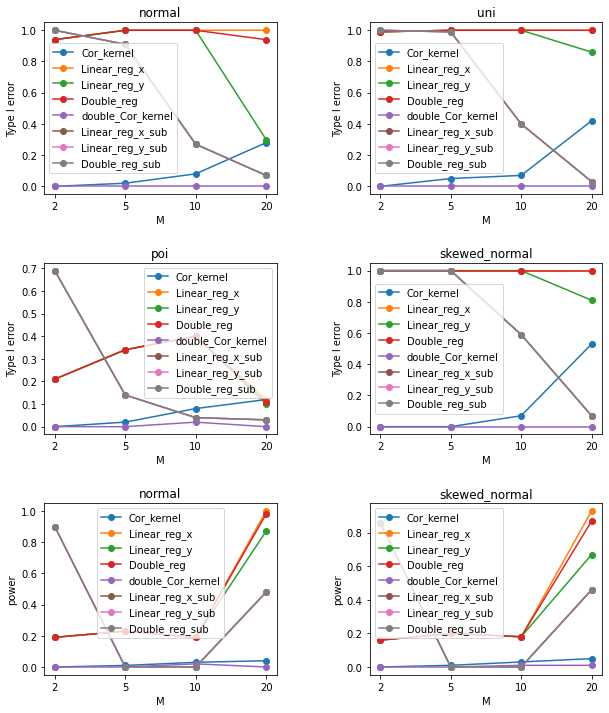

In [10]:
types = ["normal", "uni", "poi", "skewed_normal", "normal", "skewed_normal"]
hs =  ["h0"] * 4 + ["h1"] * 2
plt.figure(figsize=(10,12))
plt.subplots_adjust(wspace=.4, hspace=.4)
for t in range(len(types)):
    plt.subplot(3, 2, t+1)
    result = pd.read_csv("./results/result_smooth/result_func38_"+hs[t]+"_"+types[t]+".csv", index_col=0)
    plt.plot(result.T, '-o')
    plt.xlabel("M")
    if hs[t] == "h0":
        plt.ylabel("Type I error")
    else:
        plt.ylabel("power")
    plt.legend(result.index)
    plt.title(types[t])
plt.show()

### experiment 4

$f_x(Z)=Z$, $f_y(Z)=5Z$, sub $=2$, $\epsilon_x \sim N(\cdot, 1)$, $\epsilon_y \sim N(\cdot, 1)$.

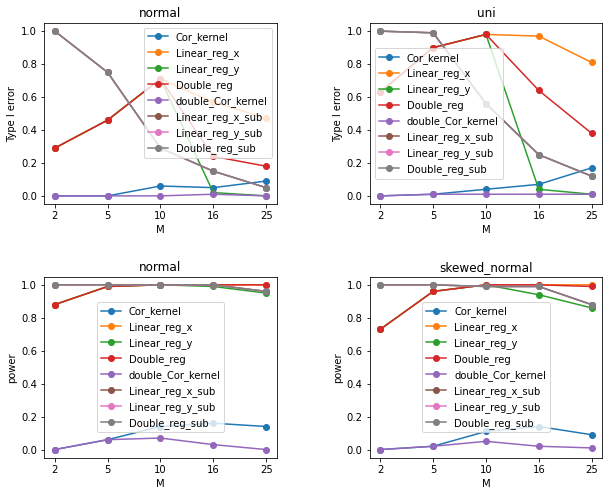

In [12]:
types = ["normal", "uni", "normal", "skewed_normal"]
hs =  ["h0"] * 2 + ["h1"] * 2
plt.figure(figsize=(10,8))
plt.subplots_adjust(wspace=.4, hspace=.4)
for t in range(len(types)):
    plt.subplot(2, 2, t+1)
    result = pd.read_csv("./results/result_smooth/result_func3_00_"+hs[t]+"_"+types[t]+".csv", index_col=0)
    result = result.iloc[:8,]
    plt.plot(result.T, '-o')
    plt.xlabel("M")
    if hs[t] == "h0":
        plt.ylabel("Type I error")
    else:
        plt.ylabel("power")
    plt.legend(result.index)
    plt.title(types[t])
plt.show()

### experiment 5

$f_x(Z)=Z$, $f_y(Z)=Z$, sub $=2$.


| Distribution | Var($\epsilon_x$) | Var($\epsilon_y$) |
| -------- | -------- | -------- |
| normal / skewed_normal | 1 | 0.1 |
| normal_small | 5 | 0.01 |
| normal_large / skewed_normal_large | 5 | 0.5 |

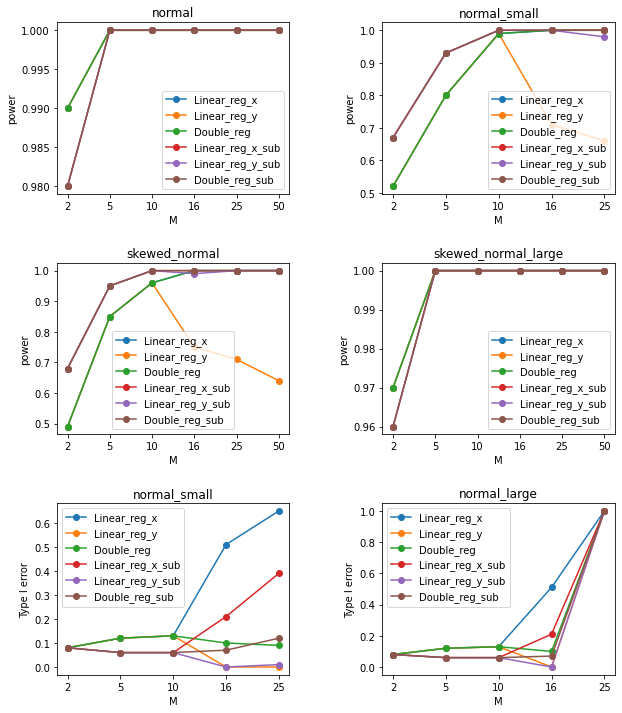

In [32]:
types = ["normal", "normal_small", "skewed_normal", "skewed_normal_large",  "normal_small", "normal_large"]
hs =  ["h1"] * 4 + ["h0"] * 2
plt.figure(figsize=(10,12))
plt.subplots_adjust(wspace=.4, hspace=.4)
for t in range(len(types)):
    plt.subplot(3, 2, t+1)
    result = pd.read_csv("./results/result_smooth/result_func0_mul_"+hs[t]+"_"+types[t]+".csv", index_col=0)
    result = result.iloc[[1,2,3,5,6,7],]
    plt.plot(result.T, '-o')
    plt.xlabel("M")
    if hs[t] == "h0":
        plt.ylabel("Type I error")
    else:
        plt.ylabel("power")
    plt.legend(result.index)
    plt.title(types[t])
plt.show()

___

**Non-smooth $X|Z$ and non-smooth $Y|Z$**

___

### experiment 6

$f_x(Z)=Z$, $f_y(Z)=Z$, sub $=2$, $\epsilon_x \sim N(\cdot, 0.1)$, $\epsilon_y \sim N(\cdot, 0.1)$.

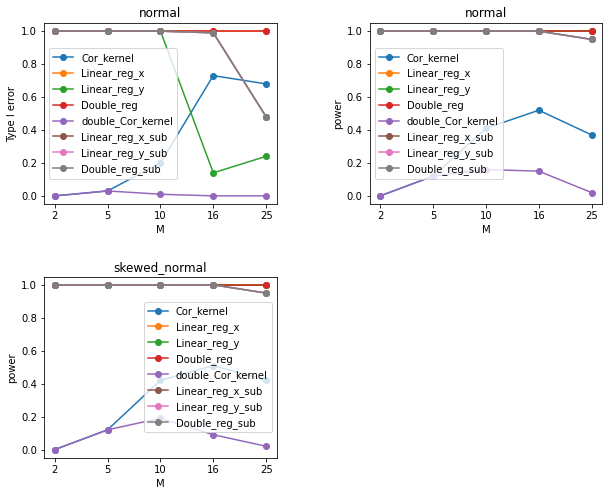

In [11]:
types = ["normal", "normal", "skewed_normal"]
hs =  ["h0"] * 1 + ["h1"] * 2
plt.figure(figsize=(10,8))
plt.subplots_adjust(wspace=.4, hspace=.4)
for t in range(len(types)):
    plt.subplot(2, 2, t+1)
    result = pd.read_csv("./results/result_smooth/result_func0_11_"+hs[t]+"_"+types[t]+".csv", index_col=0)
    result = result.iloc[:,]
    plt.plot(result.T, '-o')
    plt.xlabel("M")
    if hs[t] == "h0":
        plt.ylabel("Type I error")
    else:
        plt.ylabel("power")
    plt.legend(result.index)
    plt.title(types[t])
plt.show()

___

**Smooth $X|Z$ and smooth $Y|Z$**

___

### experiment 7

$f_x(Z)=Z$, $f_y(Z)=Z$, sub $=2$, $\epsilon_x \sim N(\cdot, 1)$, $\epsilon_y \sim N(\cdot, 1)$.

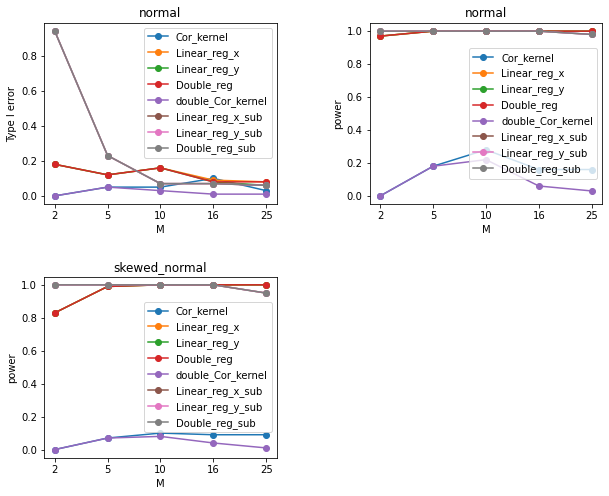

In [5]:
types = ["normal", "normal", "skewed_normal"]
hs =  ["h0"] * 1 + ["h1"] * 2
plt.figure(figsize=(10,8))
plt.subplots_adjust(wspace=.4, hspace=.4)
for t in range(len(types)):
    plt.subplot(2, 2, t+1)
    result = pd.read_csv("./results/result_smooth/result_func0_00_"+hs[t]+"_"+types[t]+".csv", index_col=0)
    result = result.iloc[:8,]
    plt.plot(result.T, '-o')
    plt.xlabel("M")
    if hs[t] == "h0":
        plt.ylabel("Type I error")
    else:
        plt.ylabel("power")
    plt.legend(result.index)
    plt.title(types[t])
plt.show()

## Part Ⅱ: Linear $f_x$ & non-linear $f_y$ in $Z$

### experiment 8

$f_x(Z)=Z$, $f_y(Z)=Z+3Z^2+2$, sub $=2$, $\epsilon_x \sim N(\cdot, 1)$, $\epsilon_y \sim N(\cdot, 0.1)$.

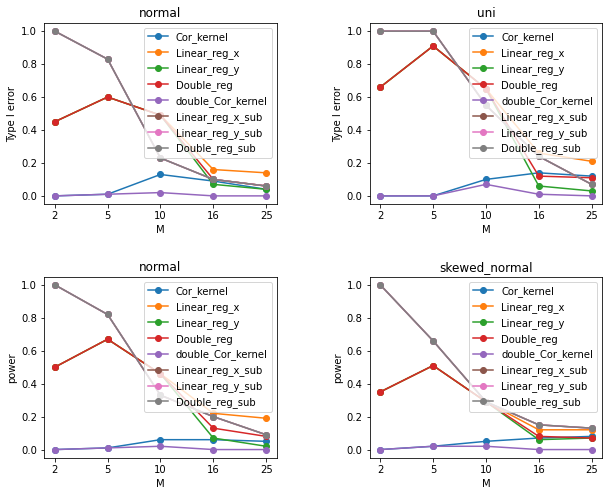

In [20]:
types = ["normal", "uni", "normal", "skewed_normal"]
hs =  ["h0"] * 2 + ["h1"] * 2
plt.figure(figsize=(10,8))
plt.subplots_adjust(wspace=.4, hspace=.4)
for t in range(len(types)):
    plt.subplot(2, 2, t+1)
    result = pd.read_csv("./results/result_smooth/result_func1_10_"+hs[t]+"_"+types[t]+".csv", index_col=0)
    result = result.iloc[:,]
    plt.plot(result.T, '-o')
    plt.xlabel("M")
    if hs[t] == "h0":
        plt.ylabel("Type I error")
    else:
        plt.ylabel("power")
    plt.legend(result.index)
    plt.title(types[t])
plt.show()

### experiment 9

$f_x(Z)=Z$, $f_y(Z)=Z+3Z^2+2$, sub $=4$, $\epsilon_x \sim N(\cdot, 1)$, $\epsilon_y \sim N(\cdot, 0.1)$.

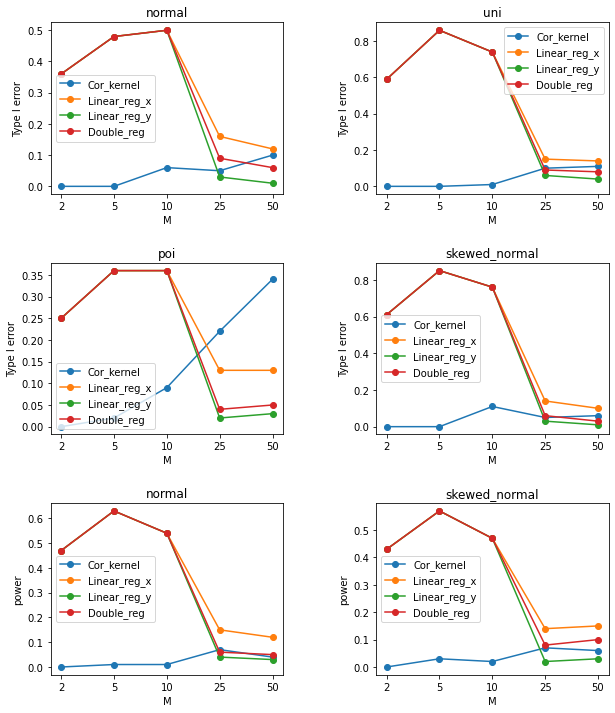

In [21]:
types = ["normal", "uni", "poi", "skewed_normal", "normal", "skewed_normal"]
hs =  ["h0"] * 4 + ["h1"] * 2
plt.figure(figsize=(10,12))
plt.subplots_adjust(wspace=.4, hspace=.4)
for t in range(len(types)):
    plt.subplot(3, 2, t+1)
    result = pd.read_csv("./results/result_smooth/result_func1_"+hs[t]+"_"+types[t]+".csv", index_col=0)
    plt.plot(result.T, '-o')
    plt.xlabel("M")
    if hs[t] == "h0":
        plt.ylabel("Type I error")
    else:
        plt.ylabel("power")
    plt.legend(result.index)
    plt.title(types[t])
plt.show()